### Week 4-7. 수치적 방법의 마술적 해결책

앞의방법은 앞서 계산된 u값과 v값을 계산할 때 한 루프에서 서로 참조하지 않고 독립적으로 계산되도록 만든 알고리즘이다. 하지만 이번에는 앞서 계산된 u를 v계산할 때 쓰이도록 만들어두면, 다음과 같이 두가지 식의 형태로 정리된다: $\frac{u^{n+1}-u^{n}}{\Delta t} = v^{n}$, $\frac{v^{n+1}-v^{n}}{\Delta t}=-\omega^2 u^{n+1}$ 그리고 이 둘은 각각 forward difference 와 backward differnece에 해당한다.


$$ v'(t_{n+1}) \approx \frac {v^{n+1}-v^{n}}{\Delta t} \qquad or \qquad v'(t_n) \approx {v^{n}-v^{n-1}}{\Delta t}, backward difference$$.

N_t: 800


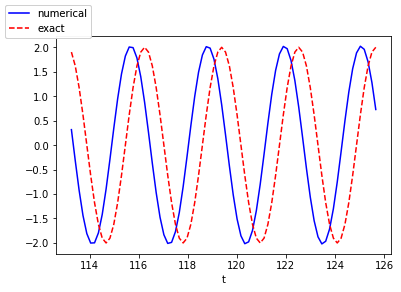

0.7283057044967003 -3.5035725322034139


In [20]:
from numpy import zeros, linspace, pi, cos
import matplotlib.pyplot as plt
 
omega = 2
P = 2*pi/omega
dt = P/20 # P/40, P/160, P/2000 for comparison
T = 40*P
N_t = int(round(T/dt))
t = linspace(0, N_t*dt, N_t+1)
print('N_t:', N_t)
 
u = zeros(N_t+1)
v = zeros(N_t+1)
 
# Initial condition
X_0 = 2
u[0] = X_0
v[0] = 0
  
# Step equations forward in time
for n in range(N_t):
    v[n+1] = v[n] - dt*omega**2*u[n]
    u[n+1] = u[n] + dt*v[n+1]
  
 # Plot the last four periods to illustrate the accuracy
 # in long time simulations
N4l = int(round(4*P/dt))  # No of intervals to be plotted
fig = plt.figure()

l1, l2 = plt.plot(t[-N4l:], u[-N4l:], 'b-',
                    t[-N4l:], X_0*cos(omega*t)[-N4l:], 'r--')
#l1, l2 = plt.plot(t, u, 'b-', t, X_0*cos(omega*t), 'r--')
fig.legend((l1, l2), ('numerical', 'exact'), 'upper left')
fig.legend((l1, l2), ('numerical', 'exact'), 'upper left')
plt.xlabel('t')
plt.show()
 #plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
print('%.16f %.16f' % (u[-1], v[-1]))


요약하자면, 첫 번째 방정식에 대해 앞차이를 사용하고 두 번째 방정식에 대해 뒷차이를 사용하면 두 방정식에서 앞차이를 사용하는 것보다 훨씬 좋은 방법이 된다.

N_t: 40000


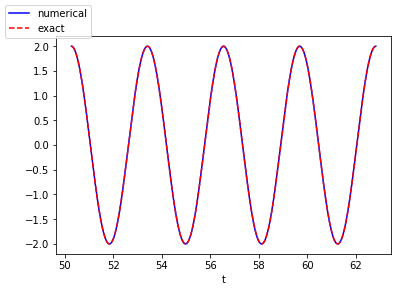

1.9999998349805954 -0.0002067089956598


In [22]:
from numpy import zeros, linspace, pi, cos
import matplotlib.pyplot as plt
 
omega = 2
P = 2*pi/omega
dt = P/2000 # P/40, P/160, P/2000 for comparison
T = 20*P
N_t = int(round(T/dt))
t = linspace(0, N_t*dt, N_t+1)
print('N_t:', N_t)
 
u = zeros(N_t+1)
v = zeros(N_t+1)
 
# Initial condition
X_0 = 2
u[0] = X_0
v[0] = 0
  
# Step equations forward in time
for n in range(N_t):
    v[n+1] = v[n] - dt*omega**2*u[n]
    u[n+1] = u[n] + dt*v[n+1]
  
 # Plot the last four periods to illustrate the accuracy
 # in long time simulations
N4l = int(round(4*P/dt))  # No of intervals to be plotted
fig = plt.figure()

l1, l2 = plt.plot(t[-N4l:], u[-N4l:], 'b-',
                    t[-N4l:], X_0*cos(omega*t)[-N4l:], 'r--')
#l1, l2 = plt.plot(t, u, 'b-', t, X_0*cos(omega*t), 'r--')
#fig.legend((l1, l2), ('numerical', 'exact'), 'upper left')
fig.legend((l1, l2), ('numerical', 'exact'), 'upper left')
plt.xlabel('t')
plt.show()
 #plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
print('%.16f %.16f' % (u[-1], v[-1]))
